# Exercício Programa 1 - MAP3121 - Métodos Numéricos e Aplicações
##  Autovalores e Autovetores de Matrizes 
## Tridiagonais Simétricas - O Algoritmo QR

In [3]:
# imports
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

##  Rotação de Givens e a fatoração QR de uma matriz tridiagonal

In [4]:
## Function to get the givens_rotation_Qk matrix for givens rotation
def givens_rotation_Qk(k,A):
    Q = np.eye(len(A))
    alfa_k = A[k,k]
    beta_k = A[k+1,k]
    ck = alfa_k/(np.sqrt((alfa_k**2)+(beta_k**2)))
    sk = -(beta_k)/(np.sqrt((alfa_k**2)+(beta_k**2)))
    Q[k,k] = ck
    Q[k,k+1] = -sk
    Q[k+1,k] = sk
    Q[k+1,k+1] = ck
    return Q
    pass

## Function which returns a matrix after a givens rotation
def QR_fatoration(A):
    R = A
    matrix_i_size = len(A)
    Q = np.eye(matrix_i_size)
    Q_iteration_size = matrix_i_size - 1
    for i in range (0, Q_iteration_size,1):
        Q = Q@np.transpose(givens_rotation_Qk(i,R))
        R = givens_rotation_Qk(i,R)@R
    return [R,Q]
    pass

## O algoritmo QR

In [5]:
def wilkinson_heuristics(A,n):
    get_sgnd = lambda d: 1 if d >= 0 else -1
    alfa_ant = A[n-2,n-2]
    alfa = A[n-1,n-1]
    beta = A[(n-2)+1,n-2]
    dk = (alfa_ant - alfa)/2
    uk = alfa + dk - get_sgnd(dk)*(np.sqrt((dk**2)+(beta**2)))
    return [uk,beta]
    pass

def QR_algorithm(A, erro = 1/1000000, spectral_shift = True):
    get_uk = lambda A,n,k,spectral_shift: wilkinson_heuristics(A,n)[0] if ((k > 0) and (spectral_shift == True)) else 0
    V = I = np.eye(len(A))
    k = 0
    for m in range(len(A),1,-1):
        beta = wilkinson_heuristics(A,m)[1]
        while(abs(beta)>erro):
            uk = get_uk(A,m,k,spectral_shift)
            R,Q = QR_fatoration(A - (uk*I))
            A = R@Q + uk*I
            V = V@Q
            k = k + 1
            beta = wilkinson_heuristics(A,m)[1]
    lamb = A
    return [V,lamb,k]
    pass

## Activity A

k with spectral shift =  7
k without spectral shift =  45
k with spectral shift =  15
k without spectral shift =  143
k with spectral shift =  31
k without spectral shift =  473
k with spectral shift =  59
k without spectral shift =  1600


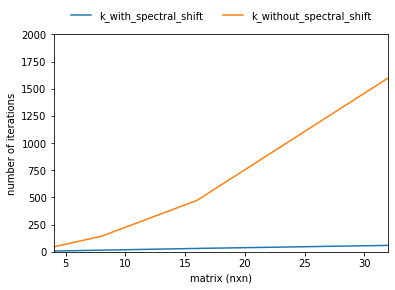

In [16]:
def make_tridiagonal_matrix(n,alfa,beta):
    A = alfa*np.eye(n)
    for i in range (0,n-1):
        A[i,i+1] = beta
        A[i+1,i] = beta
    return A
    pass

def test_matrix_values(A,V,lamb):
    print("V = ", V)
    print("lamb = ",lamb)
    new_A = V@lamb@np.transpose(V)
    new_A = np.matrix.round(new_A,3)
    print("\n")
    print("A = \n", A)
    print("V Λ V_transposto = \n", new_A)
    pass

erro = 1e-6
alfa = 2
beta = -1

k_with_spectral_shift_list = np.array([])
k_without_spectral_shift_list = np.array([])
n_list = np.array([])
for i in range (2,6):
    n = 2**i
    n_list = np.append(n_list,n)
    A_matrix = make_tridiagonal_matrix(n,alfa,beta)

    V,lamb,k = QR_algorithm(A_matrix,erro = erro,spectral_shift = True)
    k_with_spectral_shift_list = np.append(k_with_spectral_shift_list,k)
    print("k with spectral shift = ", k)
    #test_matrix_values(A_matrix,V,lamb)

    V,lamb,k = QR_algorithm(A_matrix,erro = erro,spectral_shift = False)
    k_without_spectral_shift_list = np.append(k_without_spectral_shift_list,k)
    print("k without spectral shift = ", k)
    #test_matrix_values(A_matrix,V,lamb)

plt.xlim(min(n_list), max(n_list))
plt.ylim(0, 2000)

plt.plot(n_list,k_with_spectral_shift_list,label='k_with_spectral_shift')
plt.plot(n_list,k_without_spectral_shift_list,label='k_without_spectral_shift')
plt.ylabel('number of iterations')
plt.xlabel('matrix (nxn)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)
plt.show()